# Project: Superstore Sales Analysis

In [51]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# visulization style setup
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
sns.set_palette(colors)
plt.rcParams['figure.figsize'] = (8, 4.5)
plt.rc('axes', labelsize=10, titlesize=11)

# Read dataset
train_df = pd.read_csv("./data/train.csv")

In [52]:
# View
train_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,9699,CA-2017-154116,12/15/2017,12/19/2017,Standard Class,KM-16660,Khloe Miller,Consumer,United States,Inglewood,...,90301,West,OFF-PA-10004569,Office Supplies,Paper,"Wirebound Message Books, Two 4 1/4"" x 5"" Forms...",22.830,3,0.0,10.7301
1,2230,CA-2014-128055,3/31/2014,4/5/2014,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,94122,West,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2,0.2,252.5880
2,2832,CA-2014-148915,11/1/2014,11/5/2014,Standard Class,ND-18370,Natalie DeCherney,Consumer,United States,Portland,...,97206,West,OFF-ST-10001128,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",443.920,5,0.2,-94.3330
3,9947,CA-2014-111157,3/2/2014,3/6/2014,Standard Class,NH-18610,Nicole Hansen,Corporate,United States,Philadelphia,...,19120,East,TEC-AC-10004353,Technology,Accessories,Hypercom P1300 Pinpad,151.200,3,0.2,32.1300
4,7985,CA-2017-152499,1/22/2017,1/25/2017,Second Class,EH-13765,Edward Hooks,Corporate,United States,Chicago,...,60623,Central,OFF-AR-10003481,Office Supplies,Art,Newell 348,7.872,3,0.2,0.8856


In [53]:
# Shape
nrows, ncols = train_df.shape
print("Number of rows:: %d" %nrows)
print("Number of columns:: %d" %ncols)

Number of rows:: 5246
Number of columns:: 21


In [54]:
# Columns
columns = train_df.columns.tolist()
print(columns)

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [55]:
# Rename columns - change the case to lower and replace space with '_'
train_df.rename(columns={col: col.lower().replace(" ", "_") for col in train_df.columns.tolist()}, inplace=True)

In [56]:
# Summary statistics for numerical columns
train_df.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.00000
mean,5000.272589,55563.606367,218.858152,3.780976,0.158978,28.15217
std,2868.065377,31996.659575,586.869816,2.239916,0.209878,257.91150
min,2.000000,1453.000000,0.444000,1.000000,0.000000,-6599.97800
25%,2510.500000,23223.000000,17.445000,2.000000,0.000000,1.61400
50%,5011.500000,60082.500000,55.890000,3.000000,0.200000,8.47600
75%,7477.000000,90008.000000,209.835000,5.000000,0.200000,28.99125
max,9992.000000,99301.000000,17499.950000,14.000000,0.800000,8399.97600


- *We can see the extreme values in sales, quantity and profit. This suggest that there might be potential outliers present.*

In [57]:
# Check the records with sales equal to 17499.950000
train_df[train_df.sales == 17499.950000]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
2099,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976


In [58]:
# Check the order history of the customer with highest sales
train_df[train_df.customer_id == 'TC-20980']

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
2007,6830,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,OFF-AR-10001958,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,33.960,2,0.0,9.5088
2031,8338,CA-2014-153087,12/27/2014,1/3/2015,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Decatur,...,35601,South,OFF-PA-10001243,Office Supplies,Paper,Xerox 1983,23.920,4,0.0,11.7208
2099,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
3643,8339,CA-2014-153087,12/27/2014,1/3/2015,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Decatur,...,35601,South,TEC-AC-10003198,Technology,Accessories,Enermax Acrylux Wireless Keyboard,498.000,5,0.0,184.2600
4058,3186,CA-2014-123498,11/7/2014,11/9/2014,First Class,TC-20980,Tamara Chand,Corporate,United States,Houston,...,77041,Central,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,26.046,3,0.8,-44.2782


In [59]:
# Check the sales with same product
train_df[train_df.product_id == 'TEC-CO-10004722']

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
2099,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
2892,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
4885,6426,CA-2016-143714,5/23/2016,5/27/2016,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,...,19120,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968
5132,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808


- *Its seems like the cost price of the product is high, so it might not be the outlier*

In [60]:
# Summary statistics for categorical columns.
train_df.describe(include='object')

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub-category,product_name
count,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246
unique,3434,1125,1212,4,784,784,3,1,473,48,4,1719,3,17,1707
top,CA-2017-100111,12/2/2017,9/26/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staples
freq,10,23,21,3087,23,23,2756,5246,452,1056,1700,12,3155,820,25


In [61]:
# Check for missing values in data
train_df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [62]:
# Metainformation
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5246 entries, 0 to 5245
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         5246 non-null   int64  
 1   order_id       5246 non-null   object 
 2   order_date     5246 non-null   object 
 3   ship_date      5246 non-null   object 
 4   ship_mode      5246 non-null   object 
 5   customer_id    5246 non-null   object 
 6   customer_name  5246 non-null   object 
 7   segment        5246 non-null   object 
 8   country        5246 non-null   object 
 9   city           5246 non-null   object 
 10  state          5246 non-null   object 
 11  postal_code    5246 non-null   int64  
 12  region         5246 non-null   object 
 13  product_id     5246 non-null   object 
 14  category       5246 non-null   object 
 15  sub-category   5246 non-null   object 
 16  product_name   5246 non-null   object 
 17  sales          5246 non-null   float64
 18  quantity

- *There is no missing values present in data.*
- *the datatype of each columns looks right except for date columns, let's change them into datetime format.*

In [63]:
# Change the date column values from object to date
train_df['order_date'] = pd.to_datetime(train_df.order_date)
train_df['ship_date'] = pd.to_datetime(train_df.ship_date)

In [64]:
# Print unique values in categorical values
cat_features = ['ship_mode', 'segment', 'state', 'region', 'category', 'sub-category']

for col in cat_features:
    print(col)
    print(train_df[col].unique())
    print("---" * 10)

ship_mode
['Standard Class' 'Second Class' 'First Class' 'Same Day']
------------------------------
segment
['Consumer' 'Corporate' 'Home Office']
------------------------------
state
['California' 'Oregon' 'Pennsylvania' 'Illinois' 'Ohio' 'New York'
 'Washington' 'Texas' 'Alabama' 'Rhode Island' 'Connecticut' 'Utah'
 'Tennessee' 'Wisconsin' 'Massachusetts' 'Georgia' 'Nebraska' 'Oklahoma'
 'Indiana' 'Iowa' 'Delaware' 'Nevada' 'Virginia' 'Montana' 'Missouri'
 'Florida' 'Arizona' 'North Carolina' 'Kentucky' 'Colorado' 'New Jersey'
 'Michigan' 'Maryland' 'Arkansas' 'Kansas' 'Mississippi' 'New Mexico'
 'South Carolina' 'South Dakota' 'New Hampshire' 'District of Columbia'
 'North Dakota' 'Idaho' 'Louisiana' 'Vermont' 'Minnesota' 'Maine'
 'West Virginia']
------------------------------
region
['West' 'East' 'Central' 'South']
------------------------------
category
['Office Supplies' 'Technology' 'Furniture']
------------------------------
sub-category
['Paper' 'Binders' 'Storage' 'Accessor

## Data Visualizations

In [65]:
# Create a function to return a grouped data
def get_grp(col):
    return train_df.groupby(by=[col])


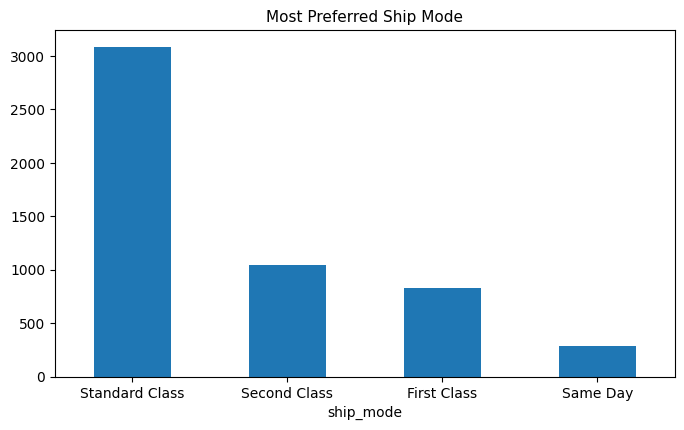

In [66]:
# Count of orders by ship mode.
train_df.ship_mode.value_counts().plot(kind='bar', title='Most Preferred Ship Mode')
plt.xticks(rotation=0)
plt.show()

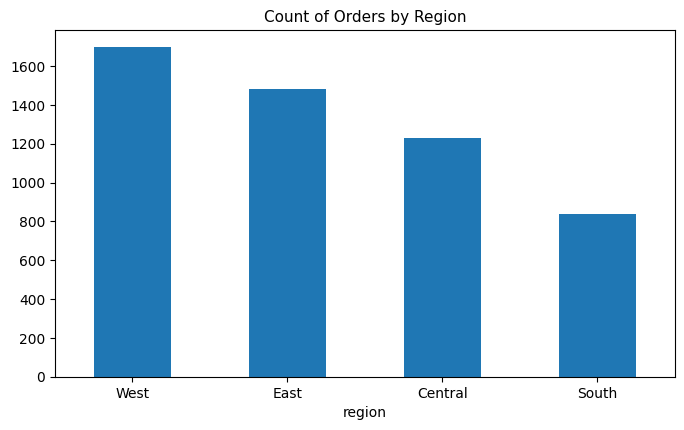

In [67]:
# Count of orders by Region
train_df.region.value_counts().plot(kind='bar', title='Count of Orders by Region')
plt.xticks(rotation=0)
plt.show()

In [68]:
# Create year-month, year, month, and day column from the order_date variable.
train_df['year_month'] = train_df['order_date'].dt.strftime("%Y-%m")
train_df['year'] = train_df['order_date'].dt.year
train_df['month'] = train_df['order_date'].dt.month
train_df['day'] = train_df['order_date'].dt.day

In [69]:
# Time take to ship the order in days
train_df['shipping_time'] = train_df['ship_date'] - train_df['order_date']

## Sales Analysis
Let's discover the patterns and trends in sales and customer perferences.

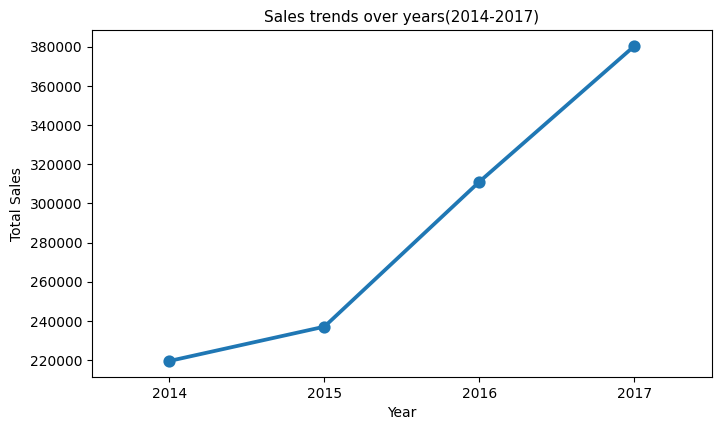

In [70]:
# Sales trend by year
total_sales_by_year = train_df.groupby(by=['year'])['sales'].sum()

# plot
sns.pointplot(data = total_sales_by_year)

# Add labels
plt.title("Sales trends over years(2014-2017)")
plt.xlabel("Year")
plt.ylabel("Total Sales")

plt.xticks(rotation=0)
plt.show()

- *This line plot shows the increasing trend in sales over the years.*
- *The highest sales can observed in year 2017.*

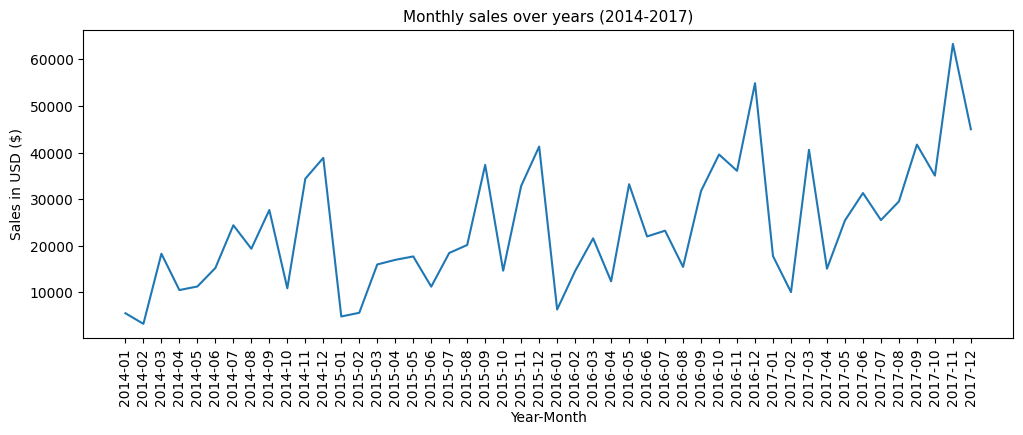

In [71]:
# Sales trend over year-months
total_sales_by_year_month = train_df.groupby(by=['year_month'])['sales'].sum().reset_index()

# plot
fig = plt.figure(figsize=(12, 4))
plt.plot(total_sales_by_year_month.year_month, total_sales_by_year_month.sales)

plt.title("Monthly sales over years (2014-2017)")
plt.xlabel("Year-Month")
plt.ylabel("Sales in USD ($)")

plt.xticks(rotation=90)
plt.show()

- *The line plot show monthly sales in USD over time, from January 2014 to December 2017.*
- *The graph displays the fluctuations in sales with high and low peaks.*
- *The seasonal patterns can observe in the plot with periodic increase and decrease in sales.*

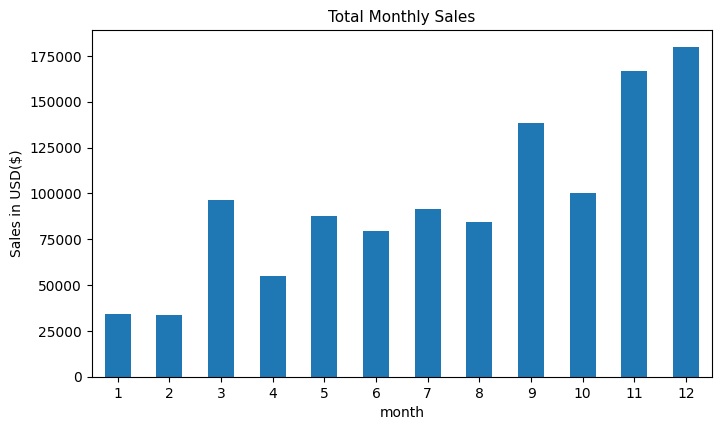

In [72]:
# Monthly sales
train_df.groupby(by='month')['sales'].sum().plot(kind='bar',
                                                 title='Total Monthly Sales', 
                                                 ylabel='Sales in USD($)')
plt.xticks(rotation=0)
plt.show()

- *The bar plot shows the total monthly sales data in USD for 12-months.*
- *The highest bar at month 12 suggest the highest sales in month of december.*
- *The fluctuation in sales over months can observe.*

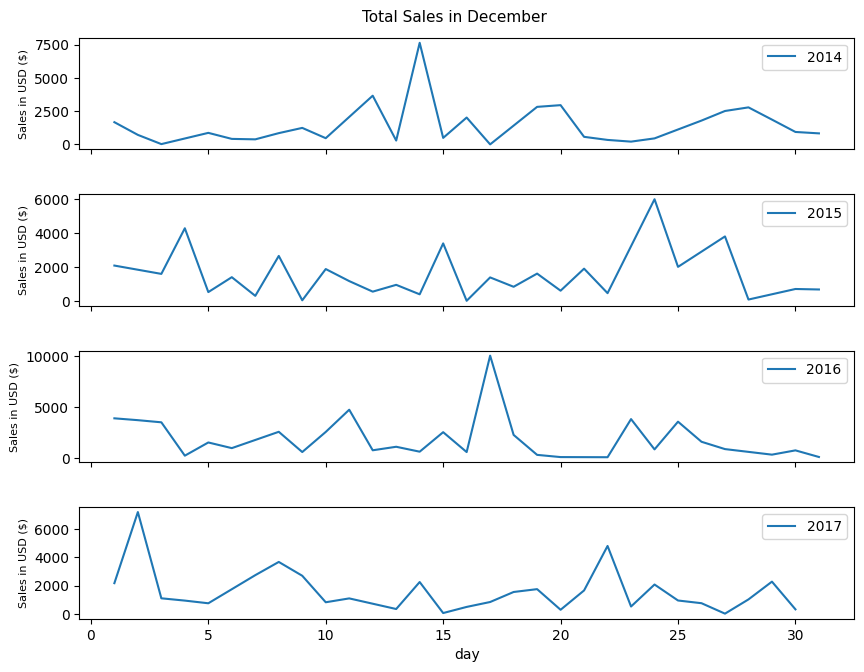

In [73]:
# Let's examine total sales in month of december for 2014, 2015, 2016, 2017
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 7), sharex=True)
fig.subplots_adjust(hspace=0.4, top=0.94)

dec_2014 = train_df[(train_df.year == 2014) & (train_df.month == 12)]
dec_2015 = train_df[(train_df.year == 2015) & (train_df.month == 12)]
dec_2016 = train_df[(train_df.year == 2016) & (train_df.month == 12)]
dec_2017 = train_df[(train_df.year == 2017) & (train_df.month == 12)]

dec_2014.groupby(by='day')['sales'].sum().plot(ax=ax[0], label='2014')
ax[0].set_ylabel('Sales in USD ($)', size=8)
ax[0].legend()

dec_2015.groupby(by='day')['sales'].sum().plot(ax=ax[1], label='2015')
ax[1].set_ylabel('Sales in USD ($)', size=8)
ax[1].legend()

dec_2016.groupby(by='day')['sales'].sum().plot(ax=ax[2], label='2016')
ax[2].set_ylabel('Sales in USD ($)', size=8)
ax[2].legend()

dec_2017.groupby(by='day')['sales'].sum().plot(ax=ax[3], label='2017')
ax[3].set_ylabel('Sales in USD ($)', size=8)
ax[3].legend()

fig.suptitle("Total Sales in December", size=11)
plt.show()

- *The above line plots for sales in december month for each year from 2014 to 2017, does not show any specific customer purchase pattern.*

### Sales by Category and Sub-category

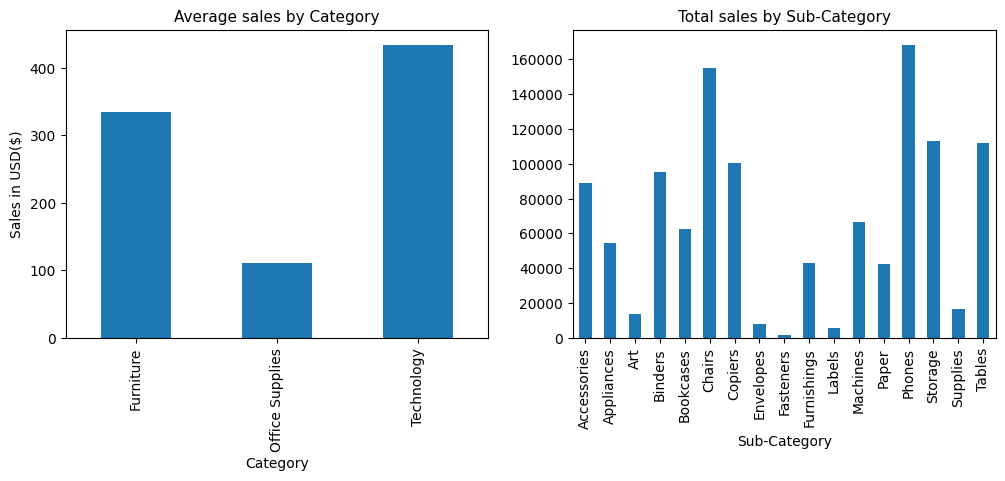

In [74]:
# Examine the sales by category and subcategory
# Data preparation
sales_cat = train_df.groupby(by=['category'])['sales'].mean()
sales_subcat = train_df.groupby(by=['sub-category'])['sales'].sum()

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sales_cat.plot(kind='bar', 
               title='Average sales by Category', 
               xlabel='Category', 
               ylabel='Sales in USD($)', 
               ax=ax[0])

sales_subcat.plot(kind='bar', 
                  title='Total sales by Sub-Category', 
                  xlabel='Sub-Category', ax=ax[1])
plt.show()

- *The subplot shows the total sales by category and subcategory.*
- *The left bar plot compares the total sales across the different category. Highest sales are from the category technology.*
- *The right bar plots shows the total sales by sub-category with highest total sales from Phones sub-category followed by chairs from furniture*

### Geographical Sales Distributions

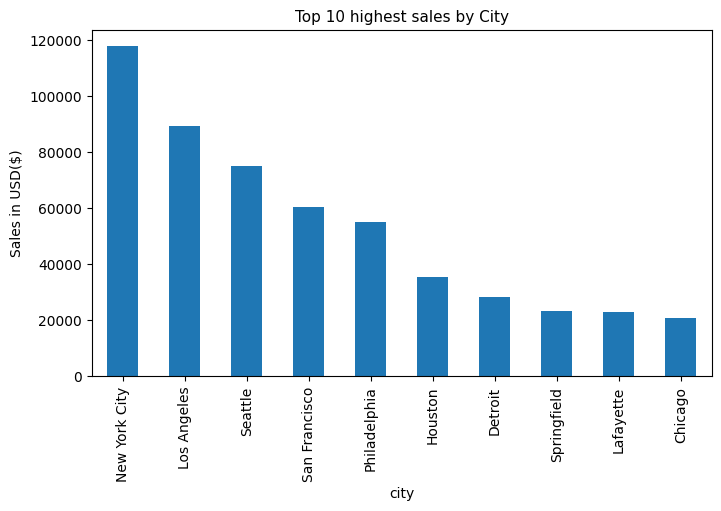

In [75]:
# Total sales by top 10 city
city_sales = train_df.groupby(by='city')['sales'].sum().sort_values(ascending=False)
city_sales.head(10).plot(kind='bar', 
                         title='Top 10 highest sales by City', ylabel='Sales in USD($)')
plt.show()

- *This bar plot compares the total sales across top 10 cities with highest sales.*
- *The highest sales are from New-York city, nearly 120,000. Los Angeles follows with sales around 80,000.*
- *The Seattle, San Francisco and philadelphia have similar sales figures, ranging between 60,000 and 70,000 indicating mid-range sales.*

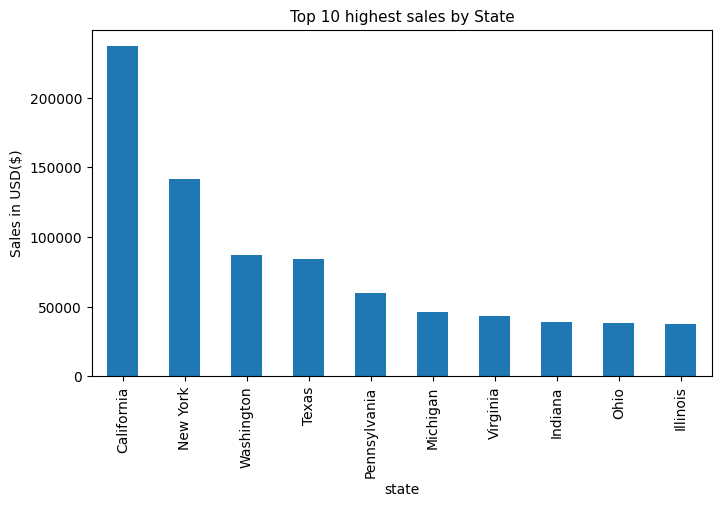

In [76]:
# Total sales by State
state_sales = train_df.groupby(by='state')['sales'].sum().sort_values(ascending=False)
state_sales.head(10).plot(kind='bar', 
                          title='Top 10 highest sales by State', ylabel='Sales in USD($)')
plt.show()

- *This bar plot the total highest sales of top 10 states.*
- *California leads with highest sales among the top 10 states of US, nearly, 240,000.*

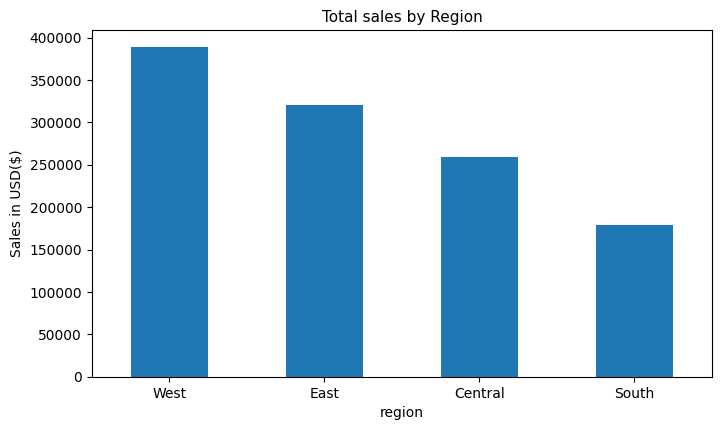

In [77]:
# Total sales by Region
region_sales = train_df.groupby(by='region')['sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Total sales by Region', ylabel='Sales in USD($)')
plt.xticks(rotation=0)
plt.show()

- *This bar plot compares the total sales across the different regions of US - west, east, central, and south.*
- *The total highest sales are from west region, ~$380,000.*

## Profit Analysis
Analyze the monthly profits over the years from 2014-17

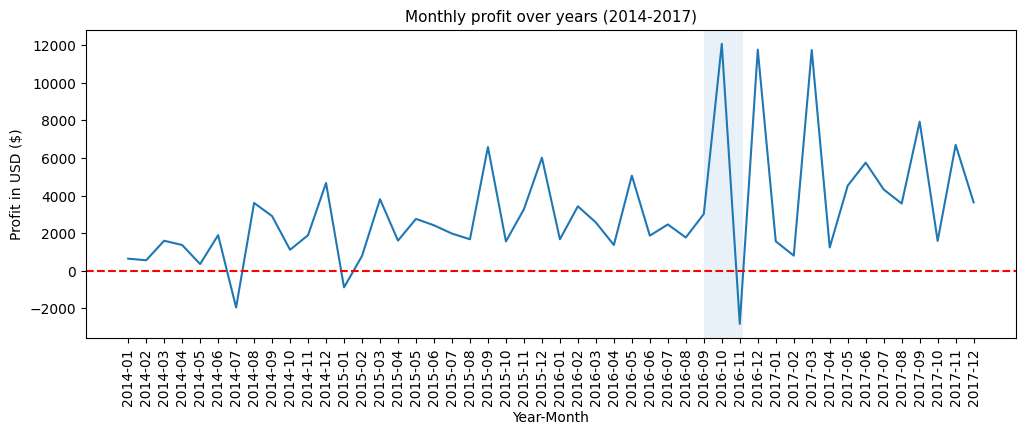

In [78]:
# Examine the total profits by monthly bases.
total_profit_by_year_month = train_df.groupby(by=['year_month'])['profit'].sum().reset_index()

# plot
fig = plt.figure(figsize=(12, 4))
plt.plot(total_profit_by_year_month.year_month, total_profit_by_year_month.profit)
plt.axhline(y=0, ls='--', color='r')
plt.axvspan(xmin=32, xmax=34.2, alpha=0.1)

plt.title("Monthly profit over years (2014-2017)")
plt.xlabel("Year-Month")
plt.ylabel("Profit in USD ($)")

plt.xticks(rotation=90)
plt.show()

- *The total monthly profit line plot shows the profit fluctuations over the time from January 2014, to December 2017.*
- *The line crosses the zero mark, indicates the month with both profit and loss.*
- *Significant peaks, the sharp spikes in profit exceed $10,000, suggesting the period of highest profitable month.*
- *A significant drop below zero is obeserve(you can see in shaded region), indicates a substantial loss in particular month.*

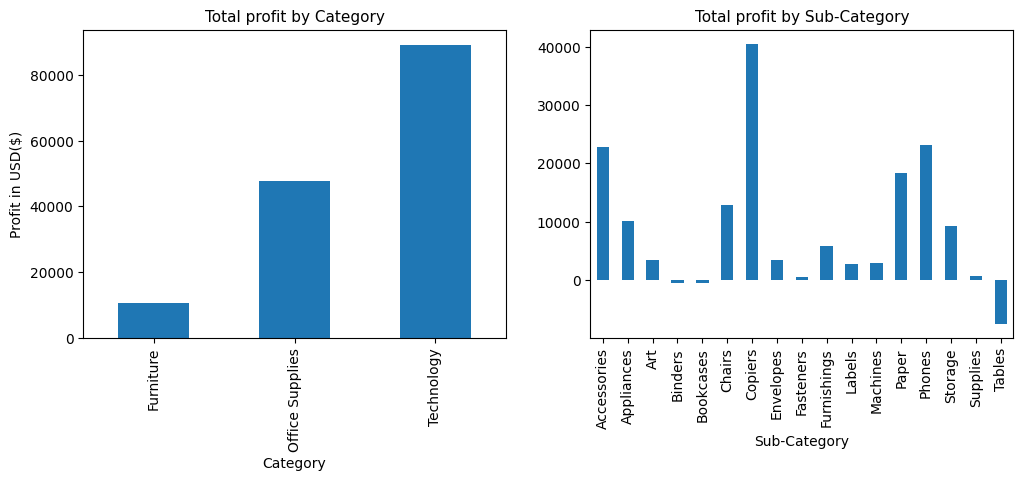

In [79]:
# Examine the profit by category and subcategory
profit_cat = train_df.groupby(by=['category'])['profit'].sum()
profit_subcat = train_df.groupby(by=['sub-category'])['profit'].sum()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

profit_cat.plot(kind='bar', title='Total profit by Category', xlabel='Category', ylabel='Profit in USD($)', ax=ax[0])
profit_subcat.plot(kind='bar', title='Total profit by Sub-Category', xlabel='Sub-Category', ax=ax[1])
plt.show()

- *The above subplot compares the profits among the different category and subcategory using bar plot.*
- *The left graphs shows the highest sales lead to the highest profits, leading technology category with higest profit.*
- *While in right graphs depicts, the highest profits are from copiers and loss from the tables sub-category.*

## Customer Segematation Analysis

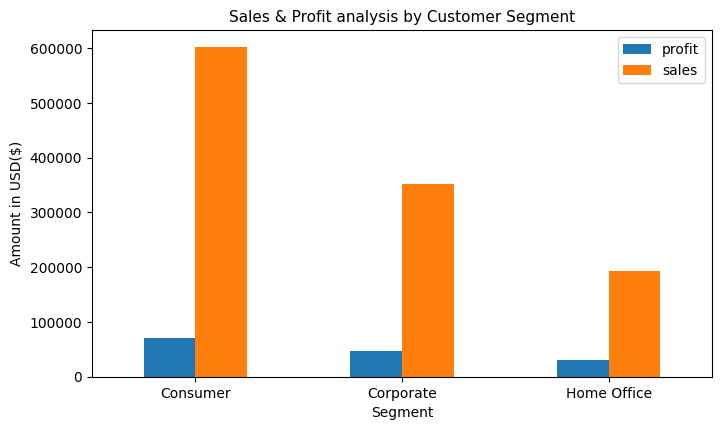

In [80]:
# Sales and Profit vs Customer segmentation
train_df.pivot_table(index='segment', values=['profit', 'sales'], aggfunc='sum').plot(kind='bar', 
                                                                                     title='Sales & Profit analysis by Customer Segment',
                                                                                     xlabel='Segment', 
                                                                                     ylabel='Amount in USD($)')
plt.xticks(rotation=0)
plt.show()

- *The bar graph compares the profitablity and sales volume across three customer segements: Consumer, Corporate and Home Office.*
- *The graph indicates the high sales but low profit.*
- *Consumer Segments shows highest sales and profits, Corporate segments shows slightly lower profit.*

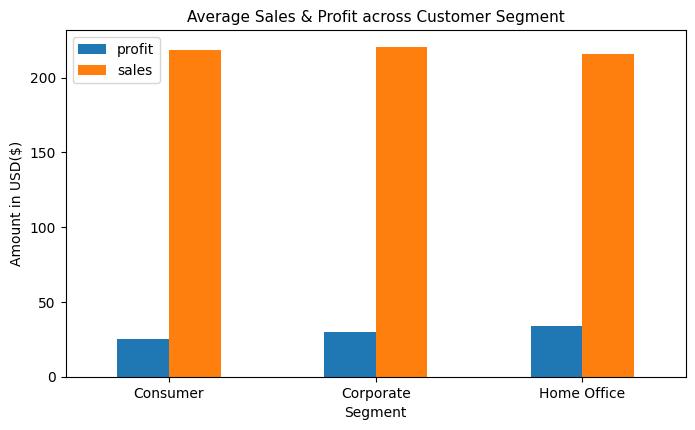

In [81]:
# Average Sales and Profit vs Customer segmentation
train_df.pivot_table(index='segment', values=['profit', 'sales'], aggfunc='mean').plot(kind='bar', 
                                                                                     title='Average Sales & Profit across Customer Segment',
                                                                                     xlabel='Segment', 
                                                                                     ylabel='Amount in USD($)')
plt.xticks(rotation=0)
plt.show()

- *The above bar plot show the equal amount of total sales and profit across customer segement.*
- *It suggest that each segment, despite its unique characteristics, contributes equally to the overall profitablility on a per-customer basis.*

*Let's further analyze the profit and sales by their ratio*

In [82]:
# Sales to profit ratio
sales_profit_by_segment = train_df.groupby(by='segment').agg({'sales': 'sum', 'profit': 'sum'})
sales_profit_by_segment['sales_to_profit_ratio'] = sales_profit_by_segment['sales'] / sales_profit_by_segment['profit']
sales_profit_by_segment['sales_to_profit_ratio'].reset_index()

,segment,sales_to_profit_ratio
0,Consumer,8.609542
1,Corporate,7.398730
2,Home Office,6.425859


- *The store has higher profits are from the consumer products*

## Product Analysis

In [83]:
# Top 10 product
total_products = train_df.product_name.nunique()

# Find top 10 products by sales
product_grp = train_df.groupby(by='product_name')
product_grp_sales = product_grp['sales'].sum()
product_grp_sales.sort_values(ascending=False).head(10).reset_index()

,product_name,sales
0,Canon imageCLASS 2200 Advanced Copier,50399.8560
1,GBC Ibimaster 500 Manual ProClick Binding System,16437.1680
2,HP Designjet T520 Inkjet Large Format Printer ...,15749.9100
3,Fellowes PB500 Electric Punch Plastic Comb Bin...,11693.1080
4,Bretford Rectangular Conference Table Tops,11265.0935
5,Hewlett Packard LaserJet 3310 Copier,11159.8140
6,Cubify CubeX 3D Printer Double Head Print,9299.9690
7,Samsung Galaxy Mega 6.3,8651.7940
8,High Speed Automatic Electric Letter Opener,8187.6500
9,Ativa V4110MDD Micro-Cut Shredder,7699.8900


In [84]:
# Find top 10 products by quantity.
product_grp_quant = product_grp['quantity'].sum()
product_grp_quant.sort_values(ascending=False).head(10).reset_index()

,product_name,quantity
0,Staples,125
1,Staple envelope,79
2,Easy-staple paper,76
3,Staples in misc. colors,56
4,KI Adjustable-Height Table,47
5,Newell 312,42
6,High-Back Leather Manager's Chair,42
7,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,42
8,Bretford Rectangular Conference Table Tops,41
9,KI Conference Tables,40


- Staples is the best selling product.

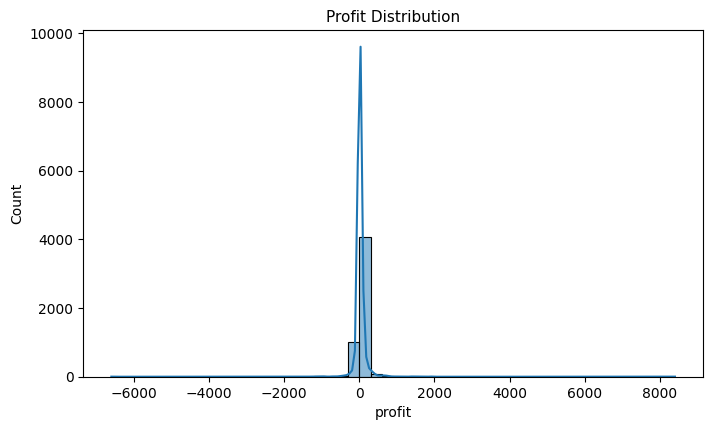

In [85]:
# Profit distribution
sns.histplot(train_df.profit, bins=50, kde=True)
plt.title("Profit Distribution")
plt.show()

- *This histogram shows the sharp peak at zero on the profit axis, indicating a high frequency of data points, with zero profit.*
- *central peak suggest that the business is often break even refers to total revenue equals to total costs, resulting neither profit or loss*
- *Few instanaces shows the significant profit or loss, implying the low variablity in financial performances.*

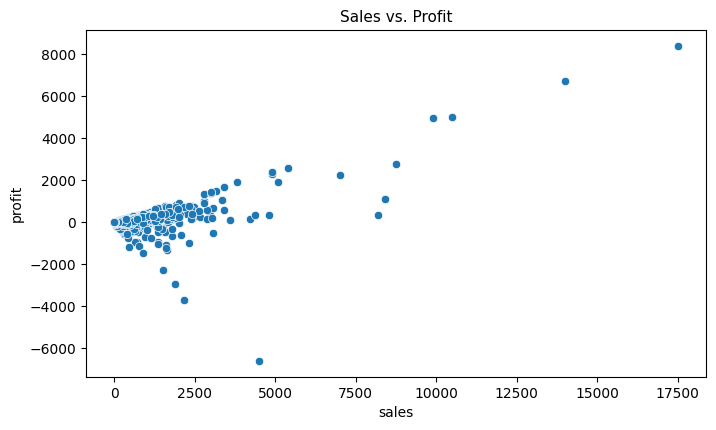

In [86]:
# Identify the relationships between continuous variables, correlation analysis
sns.scatterplot(train_df, y='profit', x='sales')

plt.title("Sales vs. Profit")
plt.show()

- *The above scatter plot shows the relationship between the profit and loss with most values clustered around lower sales values.*
- *As the sales increases, profit tends to increase though not strictly linearly indicating areas of both profitablity and loss.*

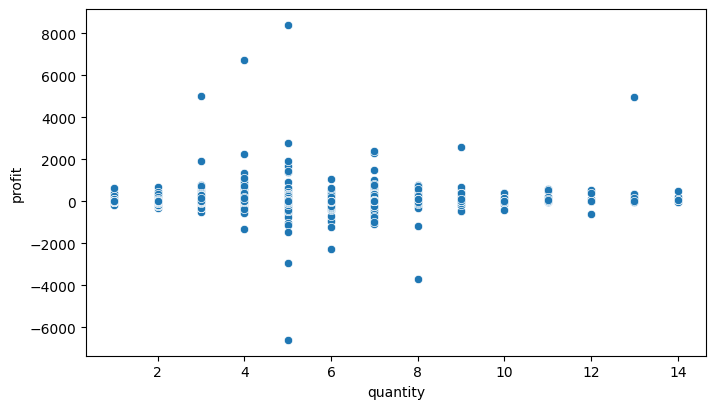

In [87]:
# correlation analysis
sns.scatterplot(train_df, x='quantity', y='profit');

- *The above scatter plot shows the relationship between quantity and profit. Most data points are near lower qunatities, with profit varying widely.*
- *We can see that as the quantity increases beyond the 10, profit variation decreases, suggesting economies of scale.*

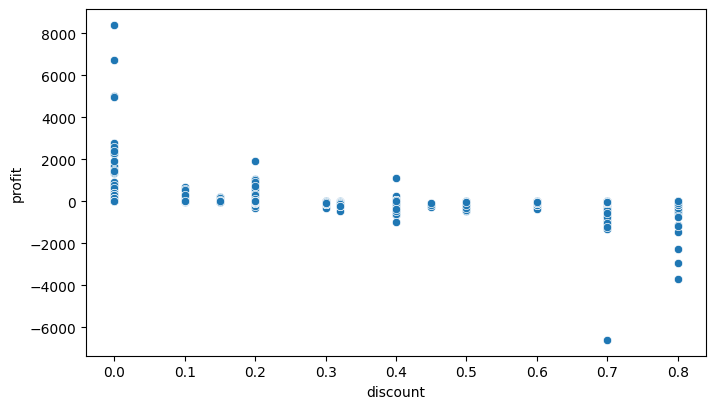

In [88]:
# correlation analysis
sns.scatterplot(train_df, x='discount', y='profit');

- *The above scatter plot shows the negative correlation between discount and profit, indicating that as discounts increase, profits tends to decrease.*
- *This suggest that higher discounts may lead to lower profitability, which is important consideration for pricing strategies.*

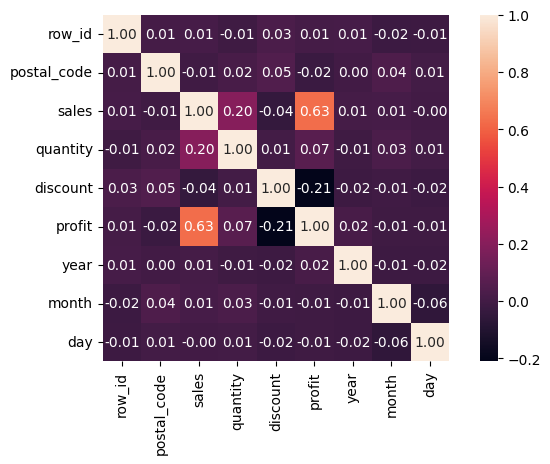

In [89]:
# Plot correlation heatmap for numerical variables.
sns.heatmap(train_df.corr(numeric_only=True), annot=True, fmt='.2f', square=True);

- *The heatmap confirms our previous finding.*
- *There is strong positive correlation between profit and sales (orange square with 0.63) meaning higher sales often lead to higher profits.*
- *Positive correlation between sales and quantity*
- *While negative correlation between discounts and both with profit and sales.*

### Shipping time 
Understand whether shipping time impacts profitablity.

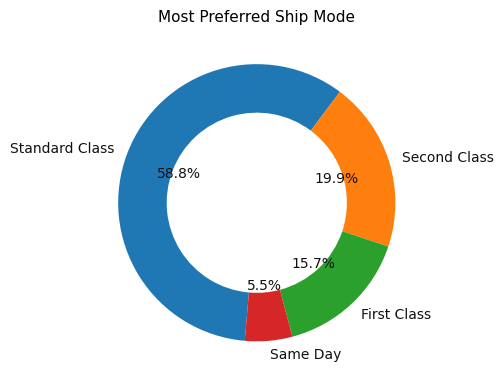

In [90]:
# Most preferred shipping mode of customer.
train_df.ship_mode.value_counts().plot(kind='pie', 
                                       colors=colors, 
                                       autopct='%1.1f%%', 
                                       startangle=265,
                                       counterclock=False,
                                       wedgeprops=dict(width=0.35, linewidth=3),
                                       textprops=dict(size=10, fontweight=500, color='#111'),
                                       ylabel='', title='Most Preferred Ship Mode')
plt.show()

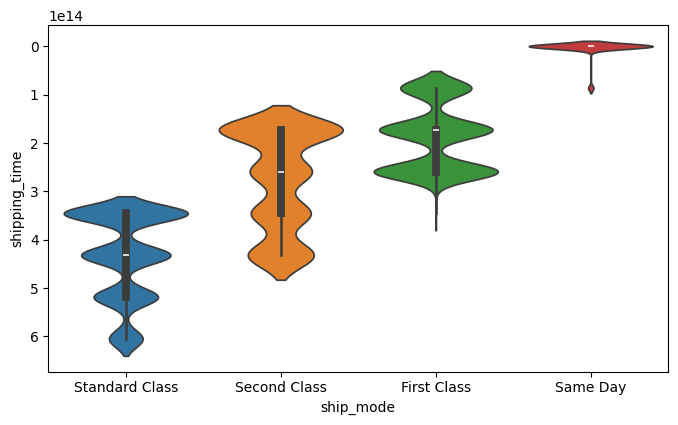

In [105]:
sns.violinplot(train_df, x='ship_mode', y='shipping_time', hue='ship_mode')
plt.show()

- *The violin plot shows the distribution of shipping time by ship mode.*
- *The same day ship mode, ships the product on the same day, that order is place.*
- *First class takes minimum 1 day to ship, maximum it takes more than 2 days.*
- *Second class shipping time ranges from 2 to more than 4 days.*
- *Standard class takes minimum 3 days to ship the order.*

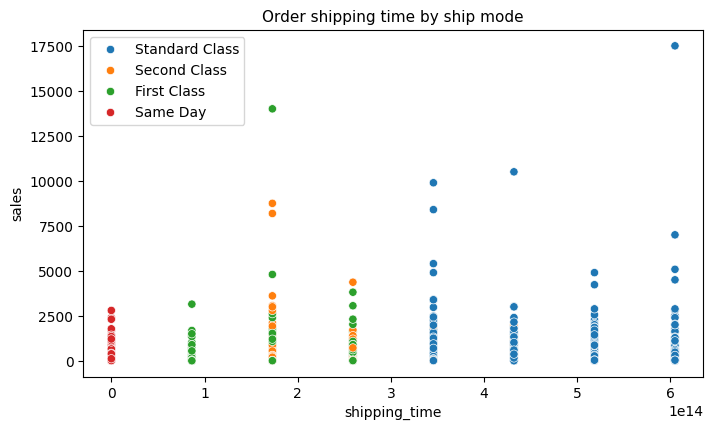

In [111]:
# Shipping time vs. sales
sns.scatterplot(data=train_df, x='shipping_time', y='sales', hue='ship_mode')

plt.title("Order shipping time by ship mode")
plt.legend(loc='upper left')
plt.show()

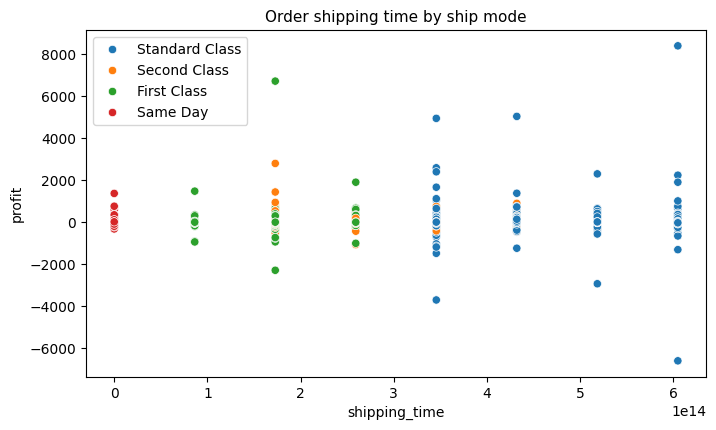

In [115]:
# Shipping time vs. profit
sns.scatterplot(data=train_df, x='shipping_time', y='profit', hue='ship_mode')

plt.title("Order shipping time by ship mode")
plt.legend(loc='upper left')
plt.show()

- *The scatter plot shows the relationship between shipping time and profits. There is no clear trends observe that indicates the longer shipping times lead to higher or lower profits. Profits vary widely regardless of shipping time.*
- *The standard class shipping mode shows the notable outliers that significantly above or belowe the average, suggesting some exceptional cases in this category. *
- *Same day category has fewer data points, which confirms that same-day deliveries are less common compared to other shipping modes.*
- *All shipping modes show a wide distribution of profit levels, indicating that factors other than shipping time might be influencing profit outcomes.*

In [121]:
train_df[train_df.ship_mode == 'Standard Class'][['profit', 'sales']].describe()

,profit,sales
count,3087.000000,3087.000000
mean,26.838112,219.452245
std,288.145065,607.040641
min,-6599.978000,0.444000
25%,1.324350,16.758000
50%,8.022000,53.400000
75%,28.466700,210.267000
max,8399.976000,17499.950000


In [126]:
train_df[train_df.profit==8399.976000]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,year_month,year,month,day,shipping_time
2099,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976,2016-10,2016,10,2,7 days


In [123]:
train_df[train_df.profit==-6599.978000]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,year_month,year,month,day,shipping_time
1882,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978,2016-11,2016,11,25,7 days


In [129]:
# Let's remove rows with those values from the data.
train_df.drop(index=2099, inplace=True)
train_df.drop(index=1882, inplace=True)